In [28]:
import pandas as pd
import numpy as np
import dtale
from sklearn.metrics import accuracy_score

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('./cleaned_dataset.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
X = dataset.drop(columns=['outcome','link'])
y = dataset.outcome

In [6]:
X.columns

Index(['season', 'capacity', 'elo_home', 'elo_away', 'home_newly_promoted',
       'home_newly_relegated', 'away_newly_promoted', 'away_newly_relegated',
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [8]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=500).fit(X_train, y_train)

In [9]:
mlpc.score(X_test, y_test)

0.7029038024834517

In [10]:
mlpc.score(X_train, y_train)

0.7059598009373339

In [11]:
y_pred = mlpc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 186,  654,  899,  112],
       [  48, 2062, 1672,  139],
       [  27, 1166, 8219,   62],
       [  20,  952,  398, 4081]])

In [12]:
mlpc.predict_proba(X_test[:5]), y_test[:5]

(array([[5.32582731e-05, 1.58627497e-04, 9.99216423e-01, 5.71691147e-04],
        [2.53644768e-11, 6.18935450e-07, 1.96813819e-06, 9.99997413e-01],
        [1.41369489e-01, 3.98636689e-01, 2.33627243e-01, 2.26366580e-01],
        [1.13522040e-01, 3.28977742e-01, 4.19319752e-01, 1.38180466e-01],
        [2.08502056e-01, 2.35486395e-01, 2.96923974e-01, 2.59087575e-01]]),
 72856    3
 909      4
 60730    4
 35382    3
 24352    2
 Name: outcome, dtype: int64)

## try it without promotion / relegation features:

In [13]:
X_slim = X.drop(columns=['home_newly_relegated','away_newly_relegated','home_newly_promoted','away_newly_promoted','capacity','season','home_goals_a_cum','home_goals_f_cum','away_goals_f_cum','away_goals_a_cum'])
X_slim.columns

Index(['elo_home', 'elo_away', 'home_streak', 'away_streak'], dtype='object')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_slim, y, test_size = 0.2, shuffle=True)
mlpc_slim = MLPClassifier(max_iter=500).fit(X_train, y_train)

In [15]:
mlpc_slim.score(X_test, y_test)

0.6236652654974151

## Random forest

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X.columns

Index(['season', 'capacity', 'elo_home', 'elo_away', 'home_newly_promoted',
       'home_newly_relegated', 'away_newly_promoted', 'away_newly_relegated',
       'home_goals_f_cum', 'home_goals_a_cum', 'away_goals_a_cum',
       'away_goals_f_cum', 'home_streak', 'away_streak'],
      dtype='object')

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(max_depth=20).fit(X_train, y_train)
rfcl.score(X_test, y_test)

0.7004396772479103

In [60]:
# feature importances
rfcl.feature_importances_

array([0.02790078, 0.03432636, 0.03587065, 0.0374365 , 0.00360749,
       0.00159283, 0.00356673, 0.00161208, 0.06433134, 0.05792659,
       0.06674357, 0.06028715, 0.29904106, 0.30575688])

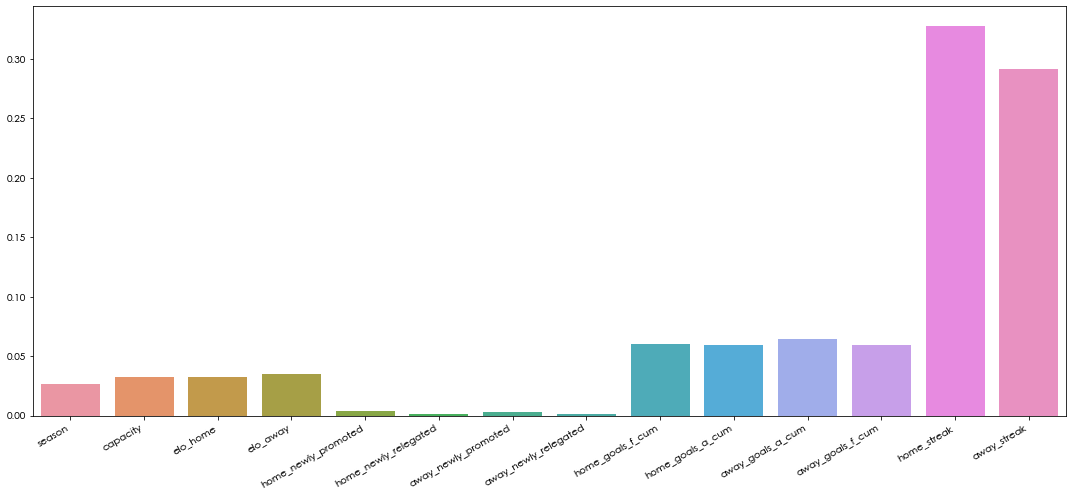

In [79]:
ax, fig = plt.subplots(figsize=[15,7])
sns.barplot(X.columns, rfcl.feature_importances_)
plt.xticks(rotation=30, horizontalalignment='right')
plt.tight_layout()

## Random Forest with just home/away streak

In [40]:
X_streaks = X[['home_streak','away_streak']]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_streaks, y, test_size = 0.2, shuffle=True)
X_train.columns

Index(['home_streak', 'away_streak'], dtype='object')

In [69]:
rfcl_streaks = RandomForestClassifier(max_depth=20).fit(X_train, y_train)
rfcl_streaks.score(X_test, y_test)

0.6368072667536357